## Summary
We're going to fit the bisecting kmeans and other flat geometries algorithms that are missing in R.

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import BisectingKMeans
from sklearn.decomposition import PCA
print("Libraries imported")

# import configuration file
from omegaconf import OmegaConf
conf = OmegaConf.load(r'E:/ppmi/exp1/config/config py.yaml')
print("Config file loaded")

Libraries imported
Config file loaded


## Data Import

In [18]:
counts = pd.read_csv(conf.additionalClustering.countPath, sep = "\t")
counts.head()

,ENSG00000278757.1,ENSG00000177757.2,ENSG00000234711.1,ENSG00000223764.2,ENSG00000187634.11,ENSG00000187642.9,ENSG00000205231.1,ENSG00000179403.11,ENSG00000234396.3,ENSG00000224387.1,...,ENSG00000280969.1,ENSG00000169789.10,ENSG00000279274.2,ENSG00000210049.1,ENSG00000278704.1,ENSG00000275987.1,ENSG00000277475.1,ENSG00000275063.1,ENSG00000276700.1,ENSG00000275757.1
0,1.302298,-1.138466,0.065775,-0.971640,-1.330496,-1.295955,0.229058,0.022169,0.154600,0.406714,...,-1.132983,-0.986817,-1.009429,0.204119,0.490124,0.583350,-1.011378,-0.452505,-1.274854,-0.962496
1,0.911781,0.585626,0.320165,0.640209,0.291987,0.664009,0.671894,0.729818,0.933728,-0.943683,...,0.640029,0.716781,-1.009429,0.148173,-0.966878,-1.002082,0.025712,-0.505232,0.786428,0.331597
2,-0.217694,1.402457,1.349388,1.488936,1.273137,1.294217,1.296287,1.116802,1.357329,1.385357,...,0.670345,0.489256,0.757250,-1.003364,1.626029,1.531725,1.846509,0.911878,0.904955,-0.962496
3,-0.464848,0.171568,-0.066254,-0.971640,-0.118448,-1.295955,-0.181662,-1.229233,0.339601,0.817482,...,-1.132983,-0.986817,-1.009429,-1.003364,-0.966878,-1.002082,-1.011378,0.785261,-1.274854,0.587492
4,1.015721,0.342817,0.408266,-0.971640,-0.381368,-1.295955,-0.037360,-0.221378,-1.145969,1.524685,...,0.899301,0.605271,-1.009429,-1.003364,0.206563,0.424199,0.393163,-0.705145,-1.274854,-0.962496


## Fitting

In [40]:
bisect_means = BisectingKMeans(n_clusters=2, random_state=42).fit(counts)

# extract the labels
labels = bisect_means.labels_

c:\Users\LAB401\anaconda3\envs\clustering\lib\site-packages\sklearn\cluster\_bisect_k_means.py:259: UserWarning: BisectingKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## PCA for data visualization

In [35]:
pca = PCA(n_components=2)
pca_object = pca.fit_transform(counts)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.59341836 0.01253965]
[1252.49564466  182.07004115]


In [41]:
finalDf = pd.DataFrame(data = pca_object,
             columns = ['principal component 1',
                        'principal component 2'])

finalDf["labels"] = labels
finalDf.head()

,principal component 1,principal component 2,labels
0,-45.580504,5.959760,0
1,7.646282,-8.753553,0
2,91.441111,2.482751,1
3,-38.493640,3.721719,0
4,-40.457636,1.310597,0


Text(0, 0.5, 'Dimension 2 (1.0%)')

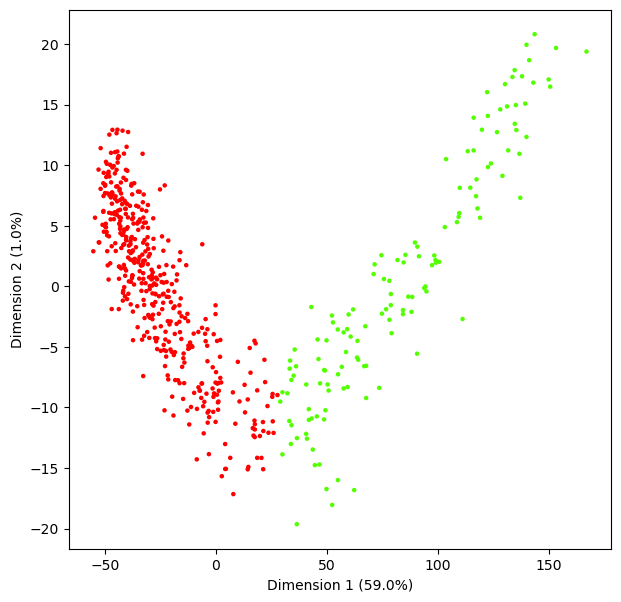

In [66]:
## Visualize labels on pca
plt.figure(figsize=(7,7))
plt.scatter(finalDf['principal component 1'],
            finalDf['principal component 2'],
            c=finalDf['labels'],
            cmap='prism',
            s=5)
plt.xlabel('Dimension 1' + " (" + str(np.round(pca.explained_variance_ratio_[0],2)*100) + "%"")")
plt.ylabel('Dimension 2' + " (" + str(np.round(pca.explained_variance_ratio_[1],2)*100) + "%"")")

## Export labels for internal metrics validation

In [67]:
np.savetxt(conf.additionalClustering.labelsPath, labels, delimiter = ",")
print('Labels exported')

Labels exported
